In [1]:
import cv2
import sys
sys.path.append("../")
import anchors
import data
from matplotlib import pyplot as plt
import numpy as np
import pickle
import matplotlib
%matplotlib notebook
norm = True

In [2]:
data_train = pickle.load(file = open('../wider_train.p', 'rb'))
svc = data.DataService(data_train, False, '../../WIDER/train_images/', (1024, 1024)
                      ,normalised = norm)
CONFIG = [[1024, 1024, 32, 32, 32, 32, 4], 
          [1024, 1024, 32, 32, 64, 64, 2],
          [1024, 1024, 32, 32, 128, 128, 1],
          [1024, 1024, 64, 64, 256, 256, 1],
          [1024, 1024, 128, 128, 512, 512, 1]] 
boxes_vec, boxes_lst, stubs = anchors.get_boxes(CONFIG, norm)

In [3]:
def print_image(img_in, boxes, normalised = norm):
    img = img_in.copy()
    h, w, _ = img.shape
    for box in boxes:
        if normalised:
            cv2.rectangle(img, (int(box[0]*h),int(box[1]*w)), (int(box[2]*h), int(box[3]*w)), (0,255,0), 3)
        else:
            cv2.rectangle(img, (int(box[0]),int(box[1])), (int(box[2]), int(box[3])), (0,255,0), 3)
    plt.figure()
    plt.imshow(img)
    plt.show()

mAP:  0.9617252543940795


<IPython.core.display.Javascript object>


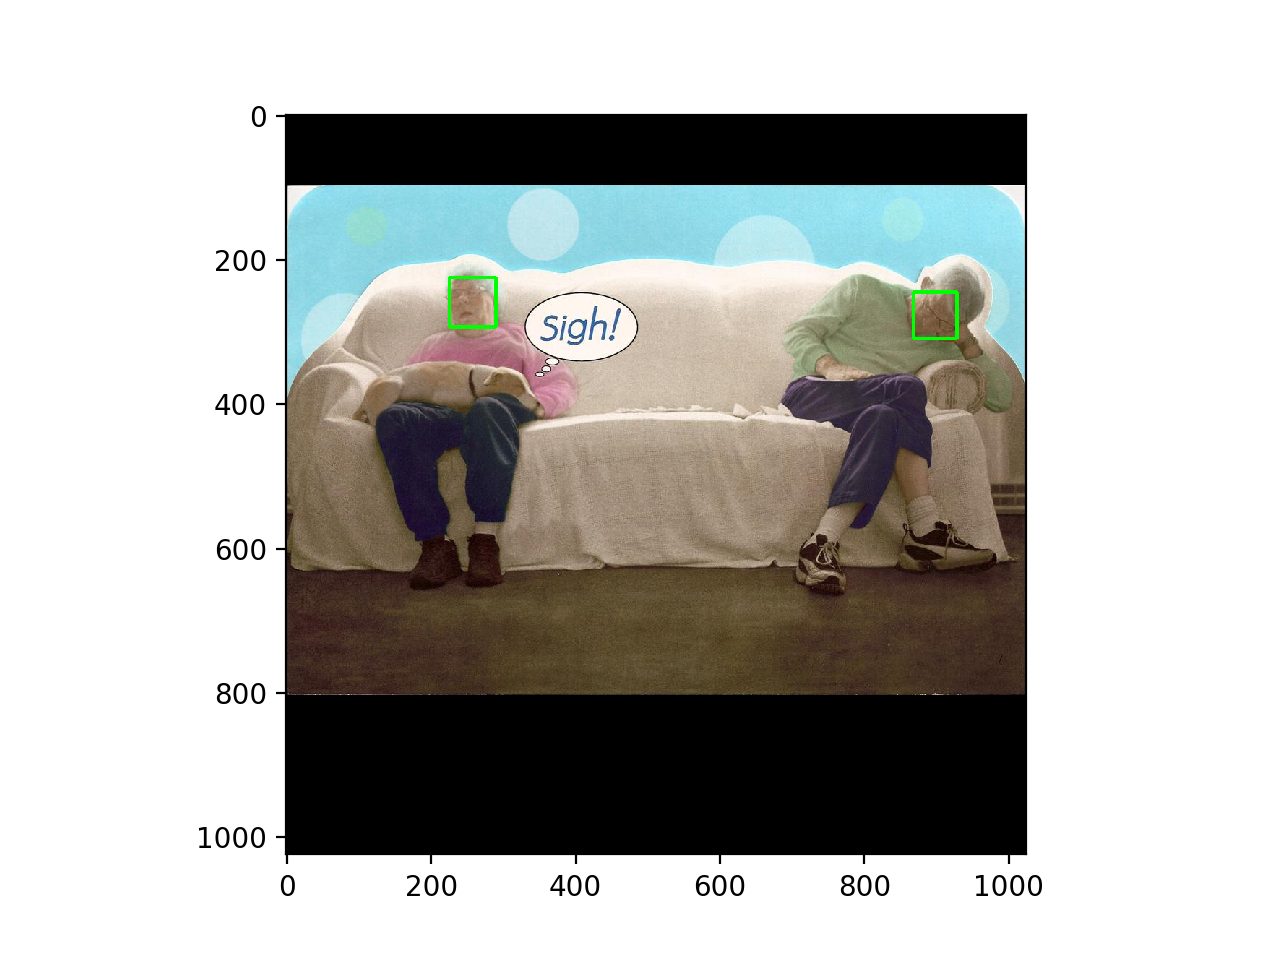

<IPython.core.display.Javascript object>


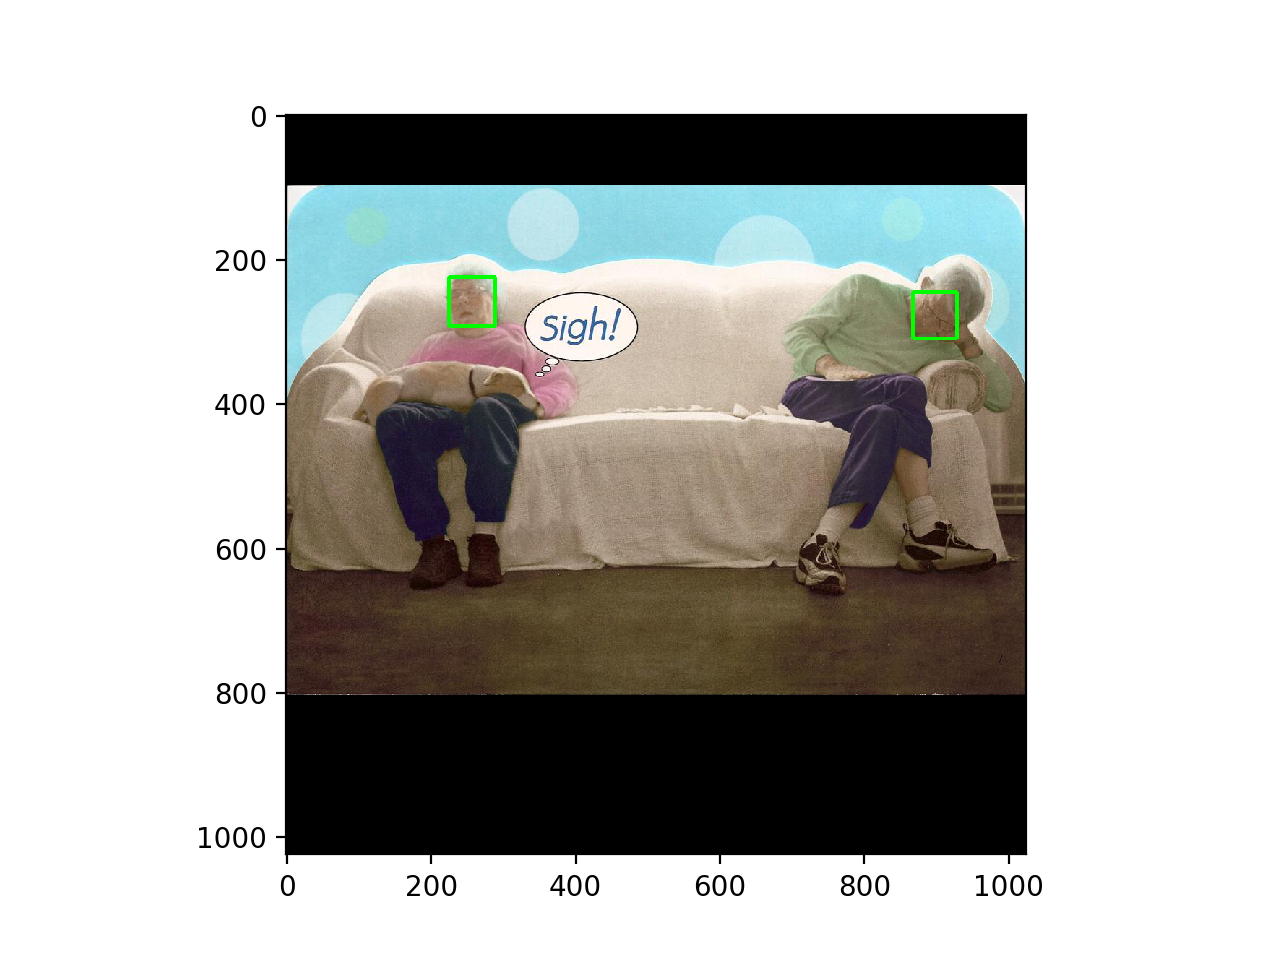

In [11]:
imgs, lbls = svc.random_sample(5)
i = 4
locs, confs_o = anchors.encode(boxes_vec, lbls[i], threshold = 0.05)
# locs[confs_o==1] = np.random.uniform(-5, 5, locs[confs_o==1].shape)
confs = np.eye(2)[confs_o.astype(int)]
boxes_preds, _, _ = anchors.decode(boxes_vec, locs, confs, do_nms = True)
print('mAP: ', anchors.compute_mAP([imgs[i]], [lbls[i]], [boxes_preds],normalised = norm))
print_image(imgs[i], lbls[i])
print_image(imgs[i], boxes_preds)